# Preditores

In [1]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

def padroestd(serie, comp_janela, passo):
    X = np.array(np.fliplr([serie[x:x+comp_janela] for x in range(0,len(serie)-comp_janela-passo+1)]))
    S = np.array(serie[comp_janela+passo-1:]) 
    return (X,S)
# a = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
# [X,S] = padroestd(a, 5,2)
# display(X,S)

In [2]:
def regressaoelm(X,D,P):
    U = np.random.randn(P, X.shape[1]+1) #Distribuição Gaussiana
    Xa = np.c_[X, np.ones(X.shape[0])]
    S = Xa@np.transpose(U)
    H = np.tanh(S)
    Ha = np.c_[H,np.ones(X.shape[0])]
    V = np.transpose(np.linalg.pinv(Ha)@D)
    R = Ha@np.transpose(V)
    Y = R
    E = D-Y
    if(D.ndim==1):
        EQM = 1/(D.shape[0])*(np.transpose(E)@E)  #EQM da rede
    else:
        EQM = 1/(D.shape[0]*D.shape[1])*(np.transpose(E)@E)  #EQM da rede
    return (U,V,Y,E,EQM)

In [3]:
def erroregressaoelm(X,D,U,V):
    Xa = np.c_[X,np.ones(X.shape[0])]
    S = Xa@np.transpose(U)
    H = np.tanh(S)
    Ha = np.c_[H,np.ones(X.shape[0])]
    R = Ha@np.transpose(V)
    Y = R
    E = D-Y
    if(D.ndim==1):
        EQM = 1/(D.shape[0])*(np.transpose(E)@E)  #EQM da rede
    else:
        EQM = 1/(D.shape[0]*D.shape[1])*(np.transpose(E)@E)  #EQM da rede
    return (Y,E,EQM)

In [4]:
pctr = 0.75 #Porcentagem conjunto de treinamento
passo = 1
comp_janela = 4
P = 5 #Quantidade de neurônios camada oculta
mat = np.array([[1868,395],[1869,118],[1870,385],[1871,1008],[1872,1096],[1873,512],[1874,217],[1875,1432],[1876,4682],[1877,1861],[1878,292],[1879,1300],[1880,731],[1881,753],[1882,1394],[1883,498],[1884,115],[1885,501],[1886,306],[1887,1167],[1888,628],[1889,1503],[1890,2585],[1891,1119],[1892,979],[1893,1216],[1894,1061],[1895,360],[1896,607],[1897,2759],[1898,796],[1899,490],[1900,1494],[1901,4489],[1902,1879],[1903,248],[1904,3237],[1905,5019],[1906,1189],[1907,159],[1908,632],[1909,3502],[1910,547],[1911,78],[1912,131],[1913,704],[1914,429],[1915,29],[1916,344],[1917,1607],[1918,768],[1919,296],[1920,2397],[1921,9797],[1922,1806],[1923,497]])
tempo = mat[:,0]
serie = mat[:,1]
display(mat.shape,tempo.shape,serie.shape)

(56, 2)

(56,)

(56,)

In [5]:
#Selecionando conjunto de treinamento e testes
numtr = np.rint(pctr*serie.shape[0])
serietr = serie[0:int(numtr+1)]
seriet = serie[int(numtr)+1:]
tempotr = tempo[0:int(numtr+1)]
tempot = tempo[int(numtr)+1:]
display(serietr.shape,tempotr.shape,seriet.shape,tempot.shape)

(43,)

(43,)

(13,)

(13,)

In [6]:
#Escalonando valores
# zmin = -1
# zmax = 1
# xmin = np.min(serietr)
# xmax = np.max(serietr)
# ztrain = ((serietr-xmin)/(xmax-xmin))*(zmax-zmin)+zmin

In [7]:
#Gerando valores de entrada(X) e saídas(D)
# [Xtr,Dtr] = padroestd(ztrain,comp_janela,passo) #Escalonado
[Xtr,Dtr]= padroestd(serietr,comp_janela,passo) #Sem escalonamento
[Xt,Dt]= padroestd(seriet,comp_janela,passo)

In [8]:
# Cross-validation Leave-One-Out
# kf = KFold(n_splits=Xtr.shape[0]) #Definindo o iterador de acordo com o valor de K escolhido
# #Utilizando o iterador criado, e repetindo o processo N vezes para cada P neurônios na camada oculta temos:
# veteqmtr = np.array([])
# veteqmv = np.array([])
# for train_index, val_index in kf.split(Xtr):
#     X_train, X_val = Xtr[train_index], Xtr[val_index]
#     D_train, D_val = Dtr[train_index], Dtr[val_index]
#     [U,V,Ytr,Etr,EQMtr] = regressaoelm(X_train,D_train,P)
#     veteqmtr = np.append(veteqmtr, EQMtr);
#     [Yv,Ev,EQMv] = erroregressaoelm(X_val,D_val,U,V)
#     veteqmv = np.append(veteqmv, EQMv);
# #[Yt,Et,EQMt] = erroregressaoelm(Xt,Dt,U,V)
# display(veteqmtr, veteqmv)

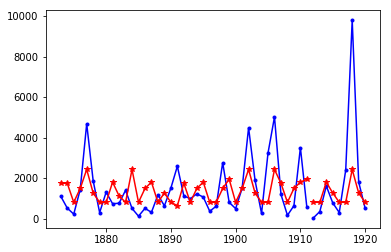

(39, 4)

(9, 4)

(39,)

(9,)

(56,)

In [9]:
[U,V,Ytr,Etr,EQMtr] = regressaoelm(Xtr,Dtr,P)
[Yt,Et,EQMt] = erroregressaoelm(Xt,Dt,U,V)
plt.plot(tempo[comp_janela+1:44],Dtr,'b.-',tempo[44:53], Dt, 'b.-', tempo[comp_janela+1:44], Ytr, 'r*-',tempo[44:53], Yt, 'r*-')
plt.show()
display(Xtr.shape,Xt.shape,Ytr.shape,Yt.shape,tempo.shape)